In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('spotify-top2018.csv')

Spotify is one of the most used and beloved music streaming service all over world. Every year Spotify provides top 100 tracks of the year by the audience. I find Spotify's data interesting as the datas are directly collected from the prefrences and behaviour of spotify users. 

Every year or a half decade, just like the fashion industry, music also has it's own trends. Through this Spotify's Top 100 list, let's ask what was the music trend of 2017-2018? 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


In [4]:
df.head(10)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.5520,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.1230,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.1310,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.1120,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.3960,0.350,91.030,217925.0,4.0
5,7dt6x5M1jzdTEt8oCbisT,Better Now,Post Malone,0.680,0.563,10.0,-5.843,1.0,0.0454,0.3540,0.000000,0.1360,0.374,145.028,231267.0,4.0
6,58q2HKrzhC3ozto2nDdN4,I Like It,Cardi B,0.816,0.726,5.0,-3.998,0.0,0.1290,0.0990,0.000000,0.3720,0.650,136.048,253390.0,4.0
7,7ef4DlsgrMEH11cDZd32M,One Kiss (with Dua Lipa),Calvin Harris,0.791,0.862,9.0,-3.240,0.0,0.1100,0.0370,0.000022,0.0814,0.592,123.994,214847.0,4.0
8,76cy1WJvNGJTj78UqeA5z,IDGAF,Dua Lipa,0.836,0.544,7.0,-5.975,1.0,0.0943,0.0403,0.000000,0.0824,0.510,97.028,217947.0,4.0
9,08bNPGLD8AhKpnnERrAc6,FRIENDS,Marshmello,0.626,0.880,9.0,-2.384,0.0,0.0504,0.2050,0.000000,0.1280,0.534,95.079,202621.0,4.0


The table shows multiple tracks by one artist, let's check who has the most tracks on the list first.

In [5]:
df['artists'].value_counts().head(10)

Post Malone       6
XXXTENTACION      6
Drake             4
Ed Sheeran        3
Marshmello        3
Selena Gomez      2
Migos             2
Kendrick Lamar    2
The Weeknd        2
Clean Bandit      2
Name: artists, dtype: int64

This list shows the top 10 artists with the number of tracks on the top 100 list. XXXTENTACION and Post Malone have each 6 tracks listed. 

Spotify has provided different analyitical characteristics of track from danceability, energy, tempo to liveness. Let's check how they are all relevant to each other.  

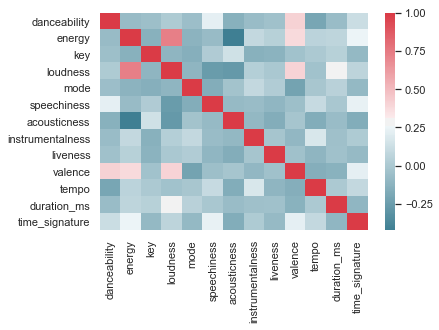

In [6]:
sns.set(style="white")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(),cmap=cmap)

In this heatmap, we can see 'loudness' and 'energy' have correlation to each other. Let's analyse how other are correlated to each other.

## Danceability analysis
### What is danceability? Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

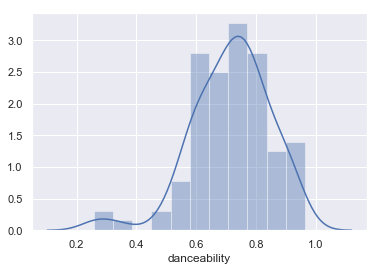

In [7]:
sns.set(style='darkgrid')
sns.distplot(df['danceability'])

The results shows most tracks are dance-friendly. Let's be more detailed seperating into three groups: 
1) greather than 75% - most danceable, 
2) grather than 50% - moderatle danceable 
3) less than 50% - calm and less danceable. 

In [21]:
# conditions
hd=df['danceability']>=0.75
md=(df['danceability']>=0.5) & (df['danceability']<0.75)
ld=df['danceability']<0.5

In [19]:
# create a new dataframe

data=[hd.sum(), md.sum(), ld.sum()]
Dance=pd.DataFrame(data,columns=['percent'],
                  index=['Very','Regular','No dance'])

In [20]:
Dance

,percent
Very,43
Regular,53
No dance,4


# Energy

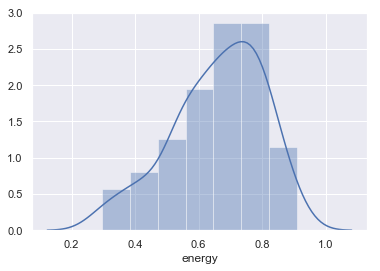

In [22]:
sns.set(style="darkgrid")
sns.distplot(df['energy'])

In [32]:
#conditions
he=df['energy']>0.7
me=(df['energy']>=0.5)&(df['energy']<0.7)
le=df['energy']<0.5


In [33]:
data=[he.sum(),me.sum(),le.sum()]
Energy=pd.DataFrame(data, columns=['percent'],
                   index=['upbeat','modeate','quiet'])

In [34]:
Energy

,percent
upbeat,45
modeate,41
quiet,13


# Loudness

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

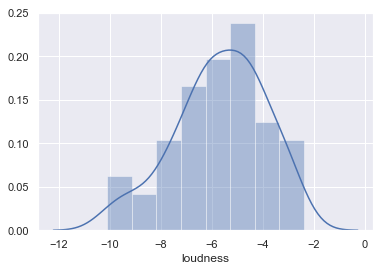

In [27]:
sns.distplot(df['loudness'])

In [29]:
#conditions, let's see if the category will show similarity to energy
loud=df['loudness']>-5
medium=(df['loudness']>=-7) & (df['loudness']<-5)
low=df['loudness']<-7

In [30]:
data=[loud.sum(),medium.sum(),low.sum()]
Loudness=pd.DataFrame(data, columns=['percent'],
                     index=['Loud','Medium','Low'])

In [31]:
Loudness

,percent
Loud,41
Medium,36
Low,23
